In [ ]:
##JOB-A-THON April 2022

# Demand Forcasting

#Problem Statement

ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at 
affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and 
MUVs, Minivans and so on.
In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the 
problem of supply and demand. The ultimate goal of the company is to strike the balance between 
the supply and demand inorder to meet the user expectations.
The company has collected the details of each rental. Based on the past data, the company would 
like to forecast the demand of car rentals on an hourly basis.

#Objective

The main objective of the problem is to develop the machine learning approach to forecast the 
demand of car rentals on an hourly basis

In [1]:
import pandas as pd
import numpy as np
import holidays
from sklearn import model_selection, preprocessing
# Libraries for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Dataset
df = pd.read_csv('../input/jobathon-april-2022/train_E1GspfA.csv')
df.head(10)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
5,2018-08-18,16,37
6,2018-08-18,17,27
7,2018-08-18,18,66
8,2018-08-18,19,80
9,2018-08-18,20,52


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [4]:
#Data Preprocessing

In [5]:
# Converting Date to Datetime (which is Object)
df['date'] = pd.to_datetime(df['date'])

In [6]:
# Extracting date, year, month, day, dayofyear, dayofweek, weekofyear
# to find more insights in the dataset

df['date'] = pd.to_datetime(df['date'])
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.day
df['dayofyear'] = df.date.dt.dayofyear
df['dayofweek'] = df.date.dt.dayofweek
df['weekofyear'] = df.date.dt.weekofyear

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [7]:
df.head()

,date,hour,demand,year,month,day,dayofyear,dayofweek,weekofyear
0,2018-08-18,9,91,2018,8,18,230,5,33
1,2018-08-18,10,21,2018,8,18,230,5,33
2,2018-08-18,13,23,2018,8,18,230,5,33
3,2018-08-18,14,104,2018,8,18,230,5,33
4,2018-08-18,15,81,2018,8,18,230,5,33


In [8]:
# Descriptive Statistics

df.describe()

,hour,demand,year,month,day,dayofyear,dayofweek,weekofyear
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430,181.799090,3.025867,26.543706
std,6.544963,41.678988,0.810979,3.618189,8.772904,110.599321,2.003638,15.828694
min,0.000000,1.000000,2018.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000,78.000000,1.000000,12.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000,185.000000,3.000000,27.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000,282.000000,5.000000,41.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000,366.000000,6.000000,53.000000


In [9]:
# Checking for Null Values (Missing values cant found)

df.isna().sum()

date          0
hour          0
demand        0
year          0
month         0
day           0
dayofyear     0
dayofweek     0
weekofyear    0
dtype: int64

In [10]:
# Dropping Duplicates Row from Dataset but there is no duplicates rows

df.drop_duplicates(subset = None,inplace = True)

In [11]:
df.shape

(18247, 9)

# Exploratory Data Analysis


In [14]:
import plotly.express as px

In [15]:
fig = px.line(df, x='date', y='demand')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

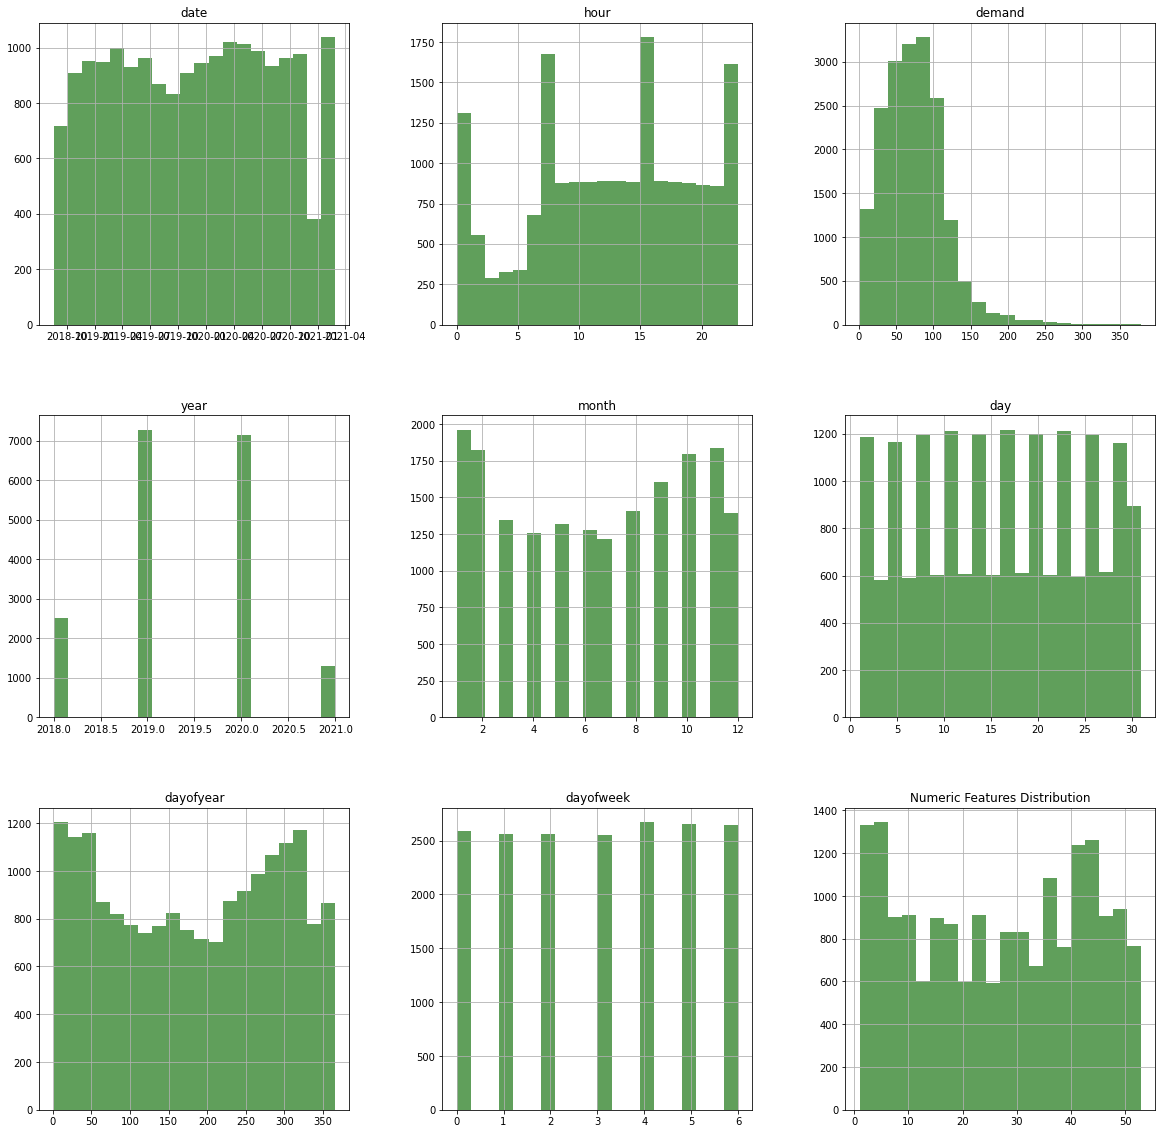

In [12]:
df.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='demand'>

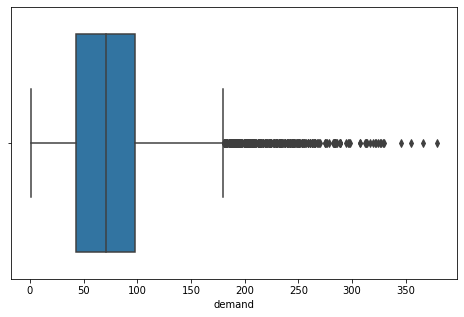

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot('demand',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='hour'>

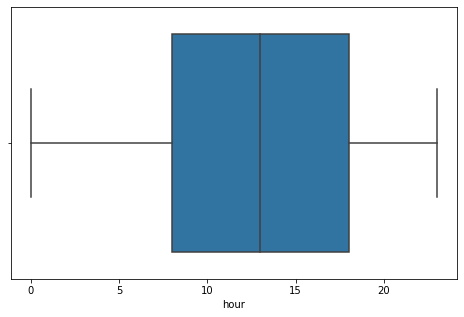

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('hour',data=df)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='demand', ylabel='count'>

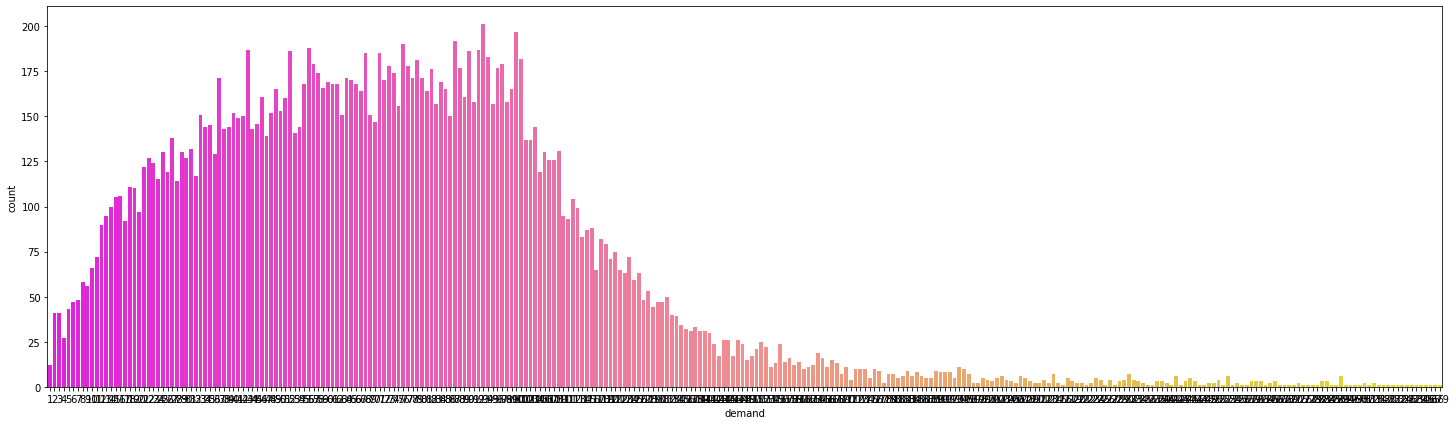

In [19]:
plt.figure(figsize=(25,7))
sns.countplot('demand',data=df,palette='spring')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18247 entries, 0 to 18246
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        18247 non-null  datetime64[ns]
 1   hour        18247 non-null  int64         
 2   demand      18247 non-null  int64         
 3   year        18247 non-null  int64         
 4   month       18247 non-null  int64         
 5   day         18247 non-null  int64         
 6   dayofyear   18247 non-null  int64         
 7   dayofweek   18247 non-null  int64         
 8   weekofyear  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 1.9 MB


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='month', ylabel='count'>

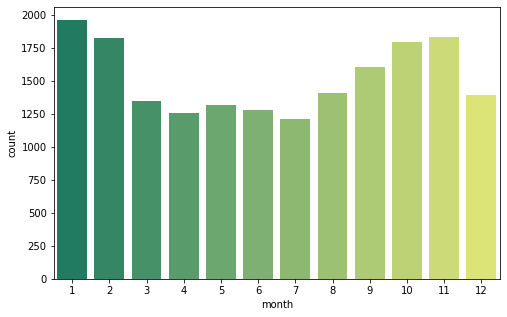

In [21]:
plt.figure(figsize=(8,5))
sns.countplot('month',data=df,palette='summer')

<Figure size 720x720 with 0 Axes>

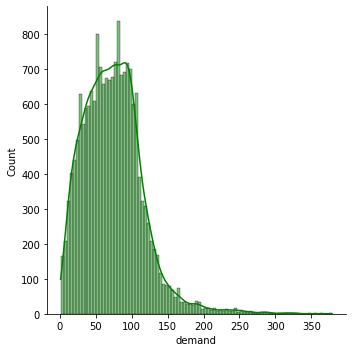

In [23]:
# Distributon plot for Demand Columns which is Right Skewed

plt.figure(figsize=(10,10))
sns.displot(df['demand'],kde=True,color='g')

<Figure size 720x720 with 0 Axes>

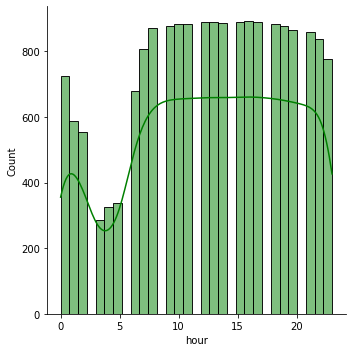

In [24]:
# Distribution of Hour Column

plt.figure(figsize=(10,10))
sns.displot(df['hour'],kde=True,color='g')

<AxesSubplot:xlabel='hour', ylabel='demand'>

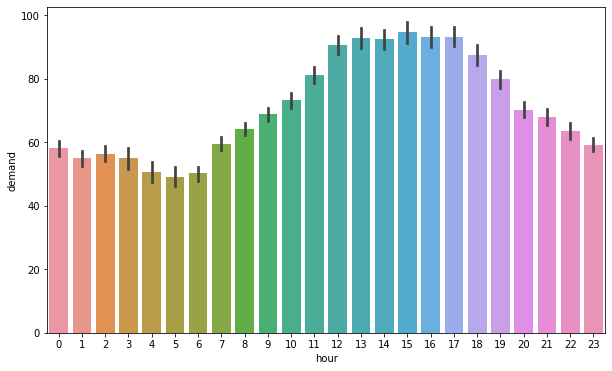

In [25]:
# Barplot of Demand according to the hour Usually from Afternoon hours to Evening Hours there is High Demand of Car for Rentals 
# Every Year the Demand is Increasing as per the Barplot

plt.figure(figsize=(10,6))
sns.barplot(x='hour',y='demand',data=df)

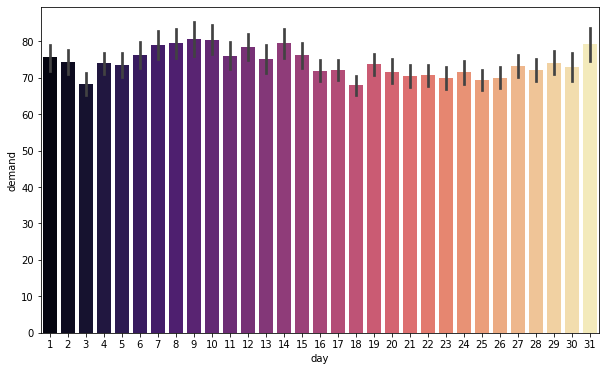

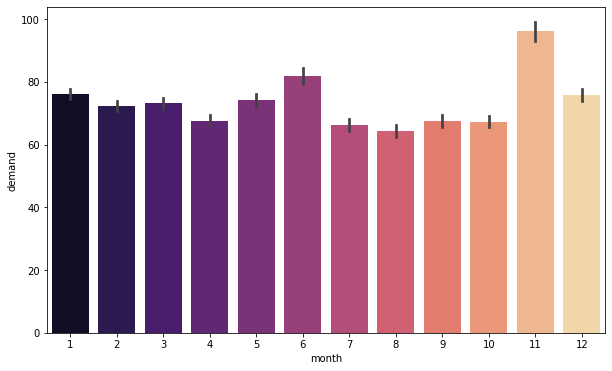

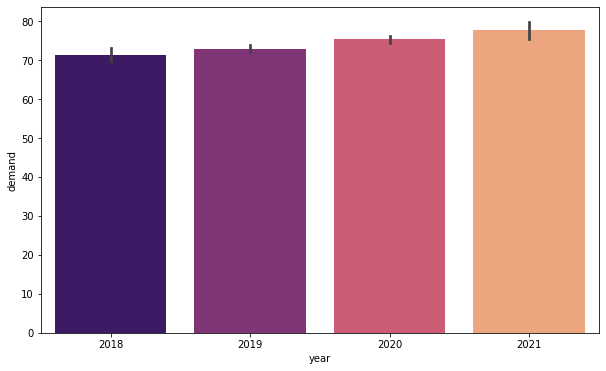

In [26]:
# Barplot for Demand according to the Day, Month, Year

discrete = ['day','month','year']
for i in discrete:
    plt.figure(figsize=(10,6))
    sns.barplot(x=i,y='demand',data=df,palette='magma')

# Feature Engineering

In [27]:
# Dropping Date from df Dataframe for Feature Engineering
df = df.drop(['date'], axis=1)

<AxesSubplot:>

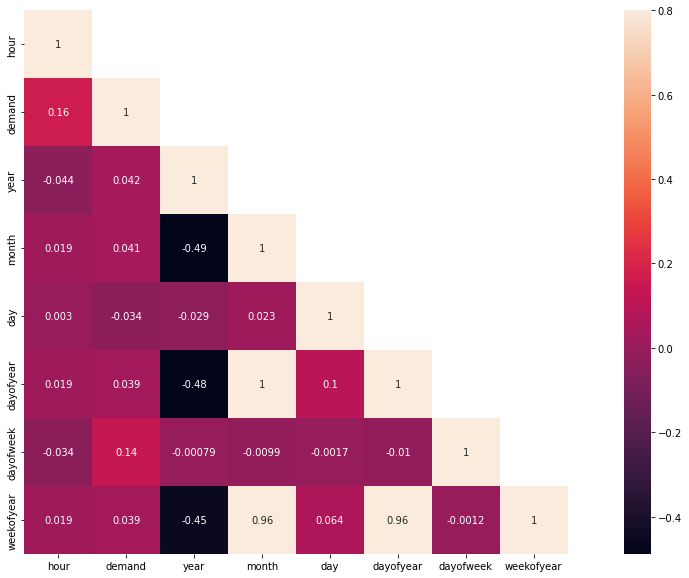

In [28]:
# Checking the Correlation Between the Independent Variables

corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

In [29]:
# There Code deletes the Columns which are Highly Correlated with each other and which less contriute for the Model
# The Columns dayofyear and weekofyear are highly Correlated so they are removed (0.96)

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]

In [30]:
df.head()

,hour,demand,year,month,day,dayofweek
0,9,91,2018,8,18,5
1,10,21,2018,8,18,5
2,13,23,2018,8,18,5
3,14,104,2018,8,18,5
4,15,81,2018,8,18,5


In [31]:
df['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

# Modelling

In [32]:
# Separating the Columns into Target Variables and Feature Variable

y = df['demand']
X = df.drop(columns = ['demand'])

In [33]:
# Here applying Statistical Analysis by using Generalised Linear Model Regression or Ordinary least-squares to Check the 
# relationship between the dependent and independent Variables
# So the Columns which has Value Greater than P-Value than Significance Value (0.05) are not Signicant for the target or less 
# Contribute for Target Variable 

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as ms
from scipy import stats


X2 = ms.add_constant(X)
est = ms.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          1.44e-226
Time:                        10:00:34   Log-Likelihood:                -93423.
No. Observations:               18247   AIC:                         1.869e+05
Df Residuals:                   18241   BIC:                         1.869e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9206.1218    856.241    -10.752      0.0

# splitting training data in tain and validation set

In [34]:
# Import Libraries for Modeling Part

from sklearn.metrics import  mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [35]:
# Splitting data Into Training and Testing Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=41)

# Prediction Models


In [37]:
# This below two Function Calculate RMSE, MSE, MAE, R2 Score for the Model


def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [38]:
# Here LightGBM is Used Because this model gives the Lowest RMSE Value among all other Regression Model for this Demand and 
# Supply Problem. This below Model is Tuned As it best to give Lowest RMSE value and high R2 Score and to give best prediction
# for testting Dataset


import lightgbm as lgb
gbm = lgb.LGBMRegressor(objective='regression', num_leaves=89,learning_rate=0.1,max_bin=200,min_sum_hessian_in_leaf = 20,
                        max_depth= 18,verbose=-1)

gbm.fit(X_train, y_train,eval_set=[(X_test, y_test)],
    eval_metric='l2_root',
    early_stopping_rounds=100)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning:

'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.



[LightGBM] [Warning] min_sum_hessian_in_leaf is set=20, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=20
[1]	valid_0's rmse: 39.7011	valid_0's l2: 1576.17
[2]	valid_0's rmse: 38.4293	valid_0's l2: 1476.81
[3]	valid_0's rmse: 37.4123	valid_0's l2: 1399.68
[4]	valid_0's rmse: 36.5771	valid_0's l2: 1337.88
[5]	valid_0's rmse: 35.6774	valid_0's l2: 1272.87
[6]	valid_0's rmse: 35.1078	valid_0's l2: 1232.55
[7]	valid_0's rmse: 34.5828	valid_0's l2: 1195.97
[8]	valid_0's rmse: 34.0662	valid_0's l2: 1160.51
[9]	valid_0's rmse: 33.6527	valid_0's l2: 1132.51
[10]	valid_0's rmse: 33.316	valid_0's l2: 1109.96
[11]	valid_0's rmse: 33.143	valid_0's l2: 1098.46
[12]	valid_0's rmse: 32.9068	valid_0's l2: 1082.86
[13]	valid_0's rmse: 32.6757	valid_0's l2: 1067.7
[14]	valid_0's rmse: 32.5697	valid_0's l2: 1060.78
[15]	valid_0's rmse: 32.4448	valid_0's l2: 1052.66
[16]	valid_0's rmse: 32.3074	valid_0's l2: 1043.77
[17]	valid_0's rmse: 32.1948	valid_0's l2: 1036.5
[18]	val

# Prediction Test

In [40]:
# Import test Dataset 

test_df = pd.read_csv('../input/jobathon-april-2022/test_6QvDdzb.csv')
test = test_df
test_df.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [41]:
# Preparing Test Dataset for Predictions

test['date'] = pd.to_datetime(test_df['date'])
test['year'] = test.date.dt.year
test['month'] = test.date.dt.month
test['day'] = test.date.dt.day
#test['dayofyear'] = test.date.dt.dayofyear
test['dayofweek'] = test.date.dt.dayofweek
#test['weekofyear'] = test.date.dt.weekofyear
test.head()

,date,hour,year,month,day,dayofweek
0,2021-03-01,0,2021,3,1,0
1,2021-03-01,1,2021,3,1,0
2,2021-03-01,2,2021,3,1,0
3,2021-03-01,3,2021,3,1,0
4,2021-03-01,5,2021,3,1,0


In [42]:
# Dropping Date because it is not required

test = test.drop(columns = ['date'])
test.head(10)

,hour,year,month,day,dayofweek
0,0,2021,3,1,0
1,1,2021,3,1,0
2,2,2021,3,1,0
3,3,2021,3,1,0
4,5,2021,3,1,0
5,6,2021,3,1,0
6,7,2021,3,1,0
7,8,2021,3,1,0
8,9,2021,3,1,0
9,10,2021,3,1,0


In [43]:
# Predicting Using the trained Model

predict = gbm.predict(test)
print('Predicted labels: ', predict)
print('Actual labels:    ' ,y_test)

Predicted labels:  [57.38297187 55.3173053  55.3173053  ... 65.98564322 61.00581766
 57.63862094]
Actual labels:     9158      91
12215    131
16587     72
5089      28
1370      58
        ... 
14050     42
10891     76
15984     53
398       87
15772    119
Name: demand, Length: 183, dtype: int64


In [49]:
# Round the Predictions because Demand is Integer

rounded = [round(x) for x in predict]
predict = rounded

In [50]:
# Storing to Submission DataFrame

date = test_df['date']
submission = pd.DataFrame({
                  "date": date,
                  "hour": test_df['hour'],
                  "demand": predict})
submission.head()

,date,hour,demand
0,2021-03-01,0,57
1,2021-03-01,1,55
2,2021-03-01,2,55
3,2021-03-01,3,55
4,2021-03-01,5,54


In [51]:
# Storing into Prediction into CSV file

submission.to_csv('Submission_Final.csv', index=False)